# _Linear Regression_

### Introduction

Linear regression is used for finding linear relationship between a target and one or more variables. It relates the variables like $X$ and $Y$ with a __straight__ _line_ ($y = mx + b$), _plane_ or _hyperplane_ to the target. Also, it's possible to relate the variables with a __curved__ hyperplane to the target as we'll see in this notebook. The added flexibility opens the door to a huge number of possible forms and it can fit an enormous variety of curves so that you may need to conduct some research to determine which functional form provides the best fit for your data.


### Learning goals

- Understand the concepts of linear algebra used in linear regression 
- Implement _linear regression_ and modify it to cover nonlinear relation using those concepts from scratch with no optimization needed


### References

- [1] Introduction to linear algebra - Gilbert Strang, Wellesley-Cambridge Press

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.pylab as pylab

%matplotlib inline

### Projection

In Linear Algebra we try to solve $Ax = b$, but often happens that it has no solution, mainly because there are too many equations, more than the unknowns, i.e., matrix $A$ is overdetermined.

Not being able to solve $Ax = b$ implies that $b$ is not in $C(A)$ (column space of $A$), probably because of some noise. Therefore we tend to find the closest answer to $b$ that lies in the column space of $A$. In other words, we try to minimize the error (or noise) $e = b - Ax$.

OK, sounds good, but how do we minimize the error? How do we find the smallest "$e$" ? By algebra, every vector $b$ splits into two parts. The part in the column space of $A$ (let's call it $p$) and the part in the left null space of $A$ (which is $e$). Now, if we solve for $A\hat{x} = p$ and let $e = b - p$, it will make $e$ perpendicular to the column space of $A$ (or should say $e$ would lie in the left null space of $A$ or $N(𝐴^𝑇)$). Thus $e$ will be minimized. That solution $\hat{x}$ is called _the ordinaray least-squares_ or _OLS_ solution.

Great! let's find that solution. In the figure represented below, consider $S$ as the column space of $A$. As you can see, vector $b$ is not in $S$ and it's splitted into $p$ and $e$. $p$ lies in $S$ and $e$ is perpendicular to it.

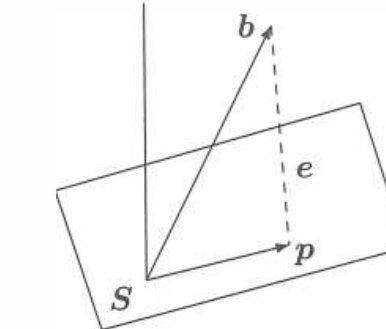

Thus we can write:

$$Ax̂ = p$$
$$e = b - p$$

Since $e$ is perpendicular to $C(A)$ and lies in $N({A^T})$, we take the transpose of $A$ and write:
$$A^Te = 0$$
$$A^T(b - A\hat{x}) = 0$$
$$A^Tb - A^TA\hat{x} = 0$$
$$A^TA\hat{x} = A^Tb$$
$$\hat{x} = (A^TA)^{-1}A^Tb$$
Awsome, we have found the equation $\hat{x}$ that can get us the closest answer to $b$ while being in $C(A)$. This equation is known as the __Normal Equation__.

_note:_ the columns of $A$ should be linearly independant from eachother, otherwise $A^TA$ can't be transposed and the equation will no longer be true.

Hence our projected value $p$ is given by:
$$ p = A\hat{x} = A(A^TA)^{-1}A^Tb$$
This corresponds to an orthogonal projection of $b$ onto the column space of $A$.

Now let's see this in practice:

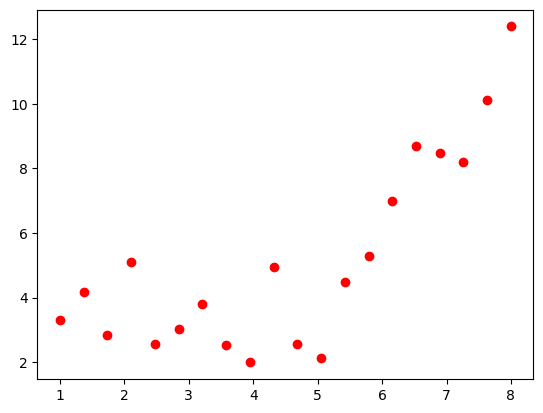

In [2]:
# our data points
n = 20
t = np.array(np.linspace(1, 8, n), dtype=np.float64)
b = np.array(2.*np.sin(t) + t + np.random.randn(1, n), dtype=np.float64)

plt.scatter(t, b, color="red")
plt.show()

## Linear relationship
We tend to find a straight line that best fits our data points. For now, let's draw a straight line with random slope and intercept and calculate the residual sum of squares (or sum of squared errors).

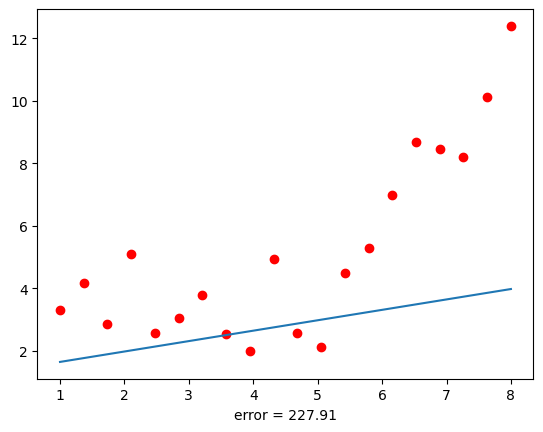

In [3]:
plt.scatter(t, b, color="red")
line = 1./3. * t + 1.31 # M*t + B
err = '{:.2f}'.format(np.linalg.norm(b - line)**2) # sum of squared errors
plt.plot(t, line)
plt.xlabel(f'error = {err}')
plt.show()

Clearly that line is not the best fitting line, let's fit another line but this time using the math concepts discussed earlier.

For this problem we're trying to find __the closest__ answer to the equaitons below because as we can see in the figure above, it is impossible to fit a straight line to those points:
$$Mt_i + B = b_i, \forall i = 1,...,9$$

Basically we're projecting point $b$ onto the column space of $A$.

Our matrix $A$ has 2 columns. The first column will have all $t_i$ variables in it and the second column will have all 1's, also $\hat{x} = \pmatrix{M \\ B}$ and $b = \pmatrix{b_1\\b_2\\.\\.\\.\\b_9}^T: A\hat{x} = b$.

We solve for $\hat{x}$ and draw the best fitting straight line:

M = 1.0592475236702703, B = 0.41293783749510515


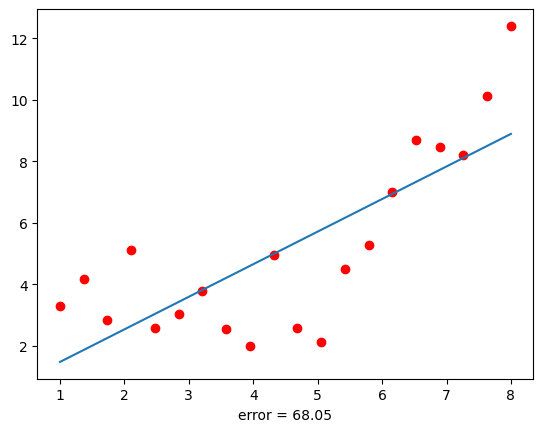

In [4]:
A = np.array([t, [1.]*n])
inv = np.linalg.inv(np.dot(A, A.T))  # (A.T . A)^-1
x_hat = np.dot(b, np.dot(A.T, inv))[0]  # A.T . A . X_hat = A.T . b => x_hat = (A.T . A)^-1 . A.T . b
M, B = x_hat[0], x_hat[1]

print(f'M = {x_hat[0]}, B = {x_hat[1]}')

line = M * t + B
err = '{:.2f}'.format(np.linalg.norm(b - line)**2) # sum of squared errors
plt.scatter(t, b, color='red')
plt.plot(t, line)
plt.xlabel(f'error = {err}')
plt.show()

This line is way better than the previous one, and as we showed earlier, using this method will minimize the error, so we conclude that this line is the best fitting _straight_ line. This is simply how _linear regression_ works.

## Nonlinear relationship

Now, let's take a step further. Let's try to fit a _curved_ line through our data points(or find a nonlinear relationship between the data and the target). How do we do that? Well, as an example let's solve for $\hat{x}$ based on the equation $Mt^2 + Nt + B = b$ instead of $Mt + B = b$.

$$Mt_i^2 + Nt_i + B = b_i, \forall i=1,...,9$$



This time our matrix $A$ will have 3 columns, the first one having all $t_i^2$ values in it and the other two will have all $t_i$ variables and all 1's in them respectively. Also $\hat{x} = \pmatrix{M \\ N \\ B}$ and $b = \pmatrix{b_1\\b_2\\.\\.\\.\\b_9}^T$.

M = 0.3814407212685995, N = -2.373718967747092, B = 6.41561024061669


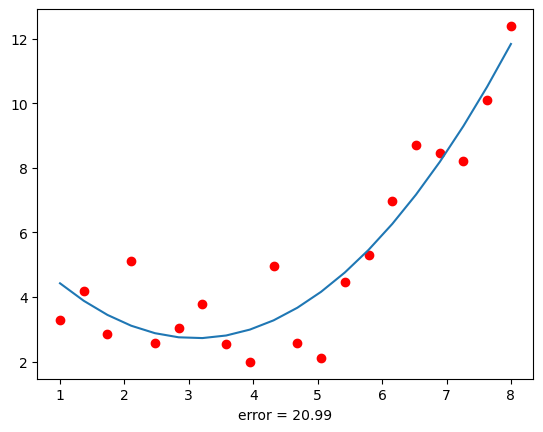

In [5]:
A = np.array([ t**2, t, [1.]*n])
inv = np.linalg.inv(np.dot(A, A.T))  # (A.T . A)^-1
x_hat = np.dot(b, np.dot(A.T, inv))[0]  # A.T . A . X_hat = A.T . b => x_hat = (A.T . A)^-1 . A.T . b

M, N, B = x_hat[0], x_hat[1], x_hat[2],
print(f'M = {M}, N = {N}, B = {B}')

line =  M * t**2 + N * t + B
err = '{:.2f}'.format(np.linalg.norm(b - line)**2) # sum of squared errors
plt.scatter(t, b, color='red')
plt.plot(t, line)
plt.xlabel(f'error = {err}')

plt.show()


This is how linear regression solves for _nonlinear relations_. Let's illustrate this with a better, bigger and more complex data points.

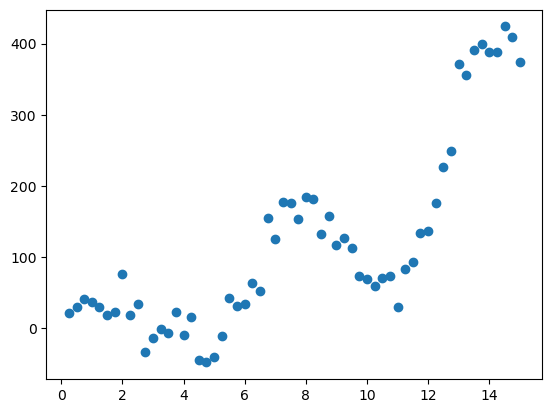

In [6]:
X = np.array([i/4 for i in range(1, 61)], dtype=np.float64)
# y is a function of x plus a possible noise(bias)
y = .25*np.cos(X)*X**2 + 1.42*X**2 + 10*X*np.sin(X) + 4.25*np.array([2 * random.gauss(0, 3) for _ in range(len(X))])

plt.scatter(X,y)
plt.show()

We will fit a curved line to these data pints just as we did before.

In [7]:
'''
    The basis equations that are used in this function are the polynomial equations.
    We are not limited to the polynomials, other equations could also be used if we want to, like sin(x),
    cos(x), log(x) and etc. but we should be careful about these equations not being independant from each other.
    For example we can't use cosh(x), exp(-x) and exp(x) all together because cosh(x) = (exp(x) + exp(-x))/2
    That will cuase the matrix np.dot(A, A.T) to be a singular matrix and there will be no solution.
    
    To include other equations we use lambda functions and store them in an array.
'''
def LR(X, y, degree=2, equations=[]):
    if type(X) != np.ndarray or type(y) != np.ndarray:
        raise EnvironmentError("X & y should be of type numpy.ndarray!")
    else:
        Eq = [X**i for i in range(degree, -1, -1)] # first we calculate the polynomials

        for i in range(len(equations)):
            Eq.append(equations[i](X)) # then we add other equations if there are any
        

        A = np.array(Eq)
        b = y
        inv = np.linalg.inv(np.dot(A, A.T))  # (A.T . A)^-1
        x_hat = np.dot(b, np.dot(A.T, inv))  # A.T . A . X_hat = A.T . b => x_hat = (A.T . A)^-1 . A.T . b
        return A, x_hat

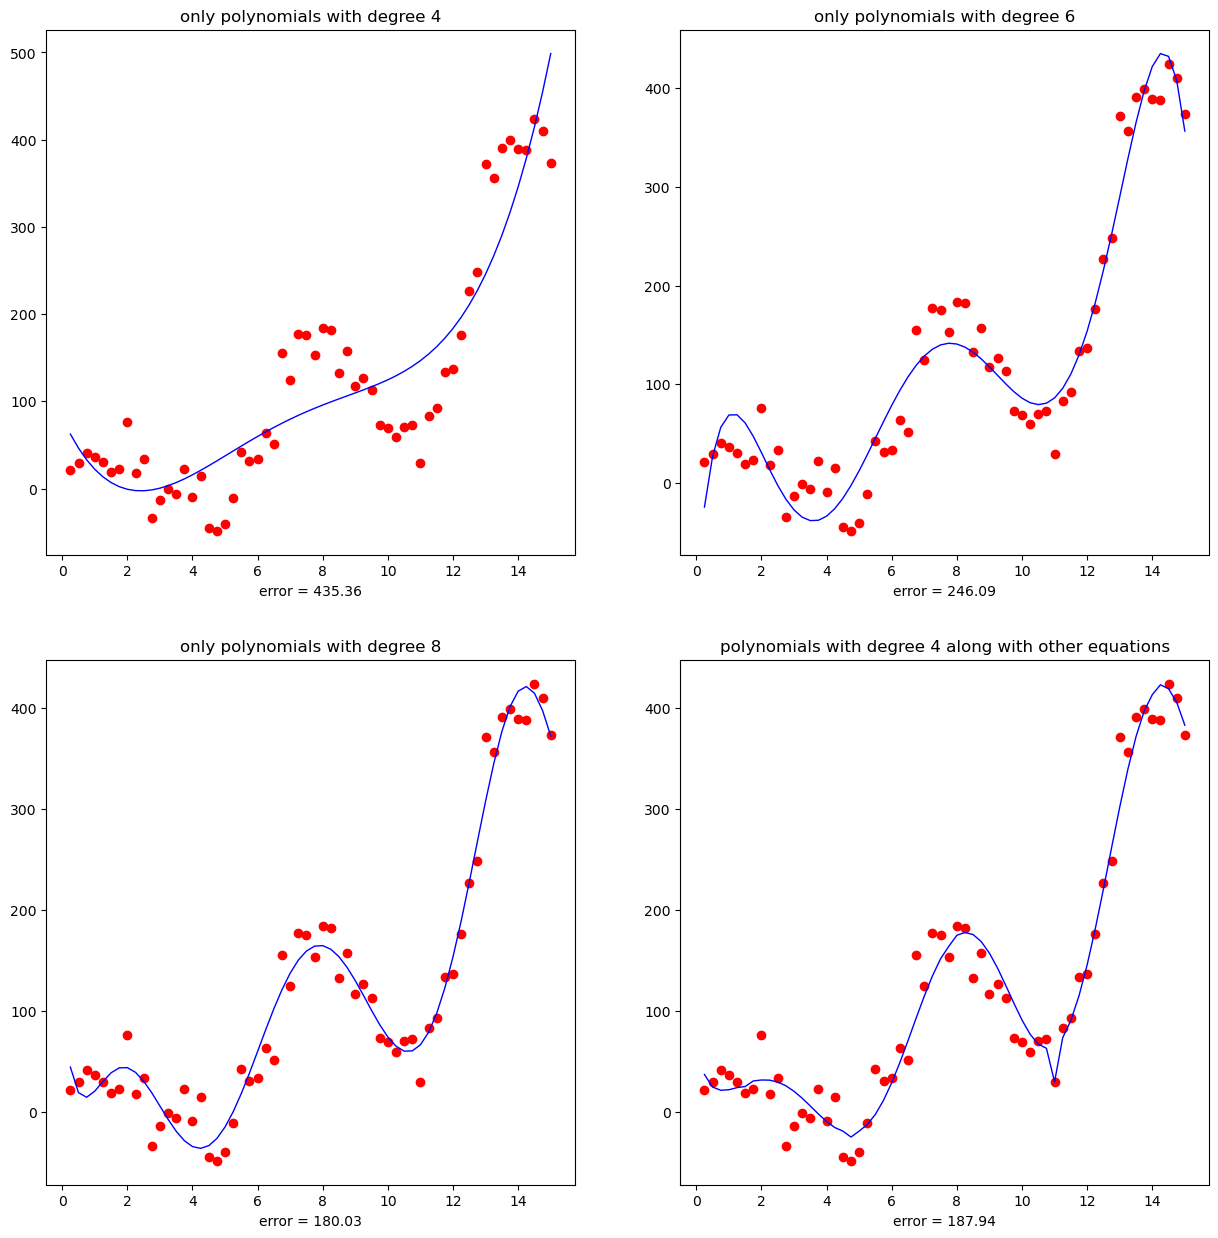

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [8]:
for i in range(1, 4):
    degree = 2 + 2*i
    A, x_hat = LR(X, y, degree=degree)
    
    y_hat = A.T @ x_hat # the estimated best fitting line
        
    err = '{:.2f}'.format(np.sqrt(sum((y - y_hat)**2))) # sum of squared errors
    
    plt.subplot(2, 2, i)
    plt.title(f"only polynomials with degree {degree}")

    plt.scatter(X, y, color='red')
    plt.plot(X, y_hat, color='blue', linewidth=1)
    plt.xlabel(f'error = {err}')

    
    
degree = 4
# some other functions: 1/cos(x), x*sin(x), log(x)
equ = [lambda x: 1./np.cos(x), lambda x: x*np.sin(x), lambda x: np.log(x)]
A, x_hat = LR(X, y, degree=degree, equations=equ) # coefficents
    
y_hat = A.T @ x_hat # the estimated best fitting line
    
err = '{:.2f}'.format(np.sqrt(sum((y - y_hat)**2))) # sum of squared errors
    
plt.subplot(2, 2, 4)
plt.title(f"polynomials with degree {degree} along with other equations")

plt.scatter(X, y, color='red')
plt.plot(X, y_hat, color='blue', linewidth=1)
plt.xlabel(f'error = {err}')
               
for i in range(1, 5):
    plt.figure(i).set_size_inches(15,15)
    
plt.show()

Beautiful, but it's not over yet. So far, we only had one variable in our examples, but almost all of the cases we face in real life have multiple variables. How do we approach that? Simple. It's all the same. We only need to apply some changes to the function we used above.

The next two examples will have 2 variables (but not more to be able to plot the results).

In [9]:
def LR(X, y, var_cnt, *args): # args = [degree1, degree2, ..., degreeK, eq1, eq2, ..., eqK]
    if type(X) != np.ndarray or type(y) != np.ndarray:
        raise EnvironmentError("X & y should be of type numpy.ndarray!")
    else:
        Eq = []
        
        for i, x in enumerate(X):
            
            for j in range(args[i], 0, -1):
                Eq.append(x**j)
                
            for equ in args[i+var_cnt]:
                Eq.append(equ(x))
        Eq.append([1 for _ in range(len(X[0]))])
        
        A = np.array(Eq)
        b = y
        
        inv = np.linalg.inv(np.dot(A, A.T))  # (A.T . A)^-1
        x_hat = np.dot(b, np.dot(A.T, inv))  # A.T . A . X_hat = A.T . b => x_hat = (A.T . A)^-1 . A.T . b
        return A, x_hat

## Example 1

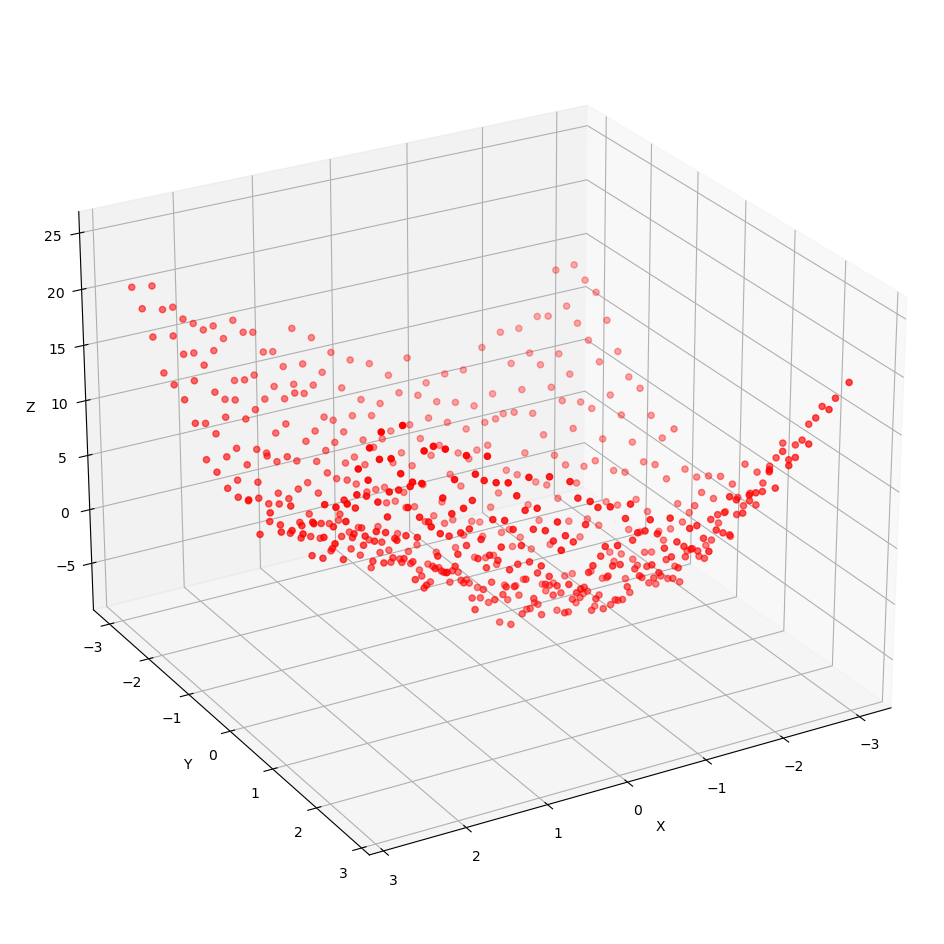

In [10]:
delta = .25
x = pylab.arange(-3., 3., delta)
y = pylab.arange(-3., 3., delta)
X, Y = pylab.meshgrid(x , y)

noise = np.array([random.gauss(0, 1) for _ in range(len(X)**2)])
noise = noise.reshape(24,24)

Z = X**2 + X + 3*np.sin(X) + Y**2 + Y - 3*np.cos(Y) + noise # Surface height

fig = plt.figure(figsize=(12, 12)) # Create figure
ax = fig.add_subplot(111, projection='3d') # Plots axes
ax.scatter(X, Y, Z, c="red") # Surface
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.view_init(25, 60)

plt.show()

In [11]:
X = X.reshape(len(X)**2)
Y = Y.reshape(len(Y)**2)
IN = np.array([X, Y]) # our input

eqX, eqY = [lambda x: np.sin(x)], [lambda y: np.cos(y)]

Z = np.array(Z).reshape(len(Z)**2)
A, x_hat = LR(IN, Z, 2, 2, 2, eqX, eqY)

In [12]:
Z_hat = A.T @ x_hat

err = '{:.2f}'.format(np.sqrt(sum((Z_hat - Z)**2)))

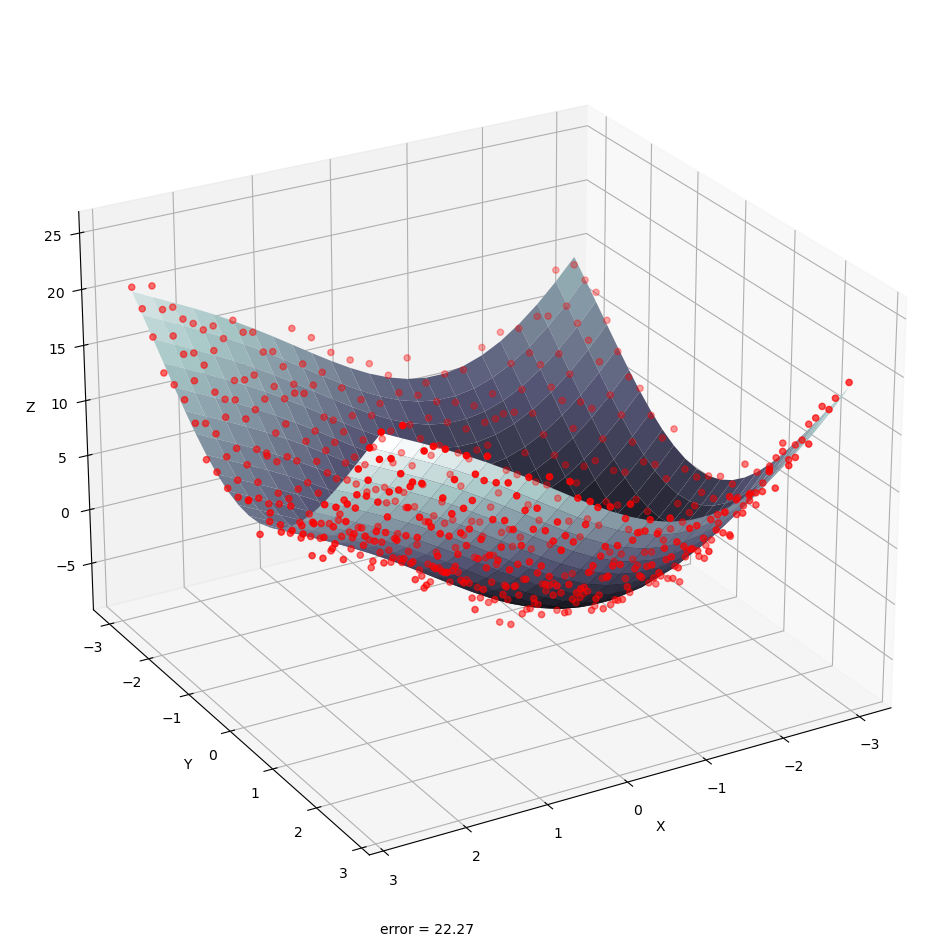

In [13]:
delta = .25
x = pylab.arange( -3., 3., delta )
y = pylab. arange( -3., 3., delta )
X, Y = pylab.meshgrid(x , y )

Z = X**2 + X + 3*np.sin(X) + Y**2 + Y - 3*np.cos(Y) + noise # Surface height

fig = plt.figure(figsize=(12, 12)) # Create figure
ax = fig.add_subplot(111, projection='3d') # Plots axes
ax.scatter(X, Y, Z, c="red")

ax.plot_surface(X, Y, Z_hat.reshape(Z.shape[0], Z.shape[1]), cmap="bone")
ax.set_xlabel( "X" )
ax.set_ylabel( "Y" )
ax.set_zlabel( "Z" )
ax.view_init(25, 60)

ax.text2D(0.4, 0, f'error = {err}', transform=ax.transAxes)
  
plt.show()

## Example 2

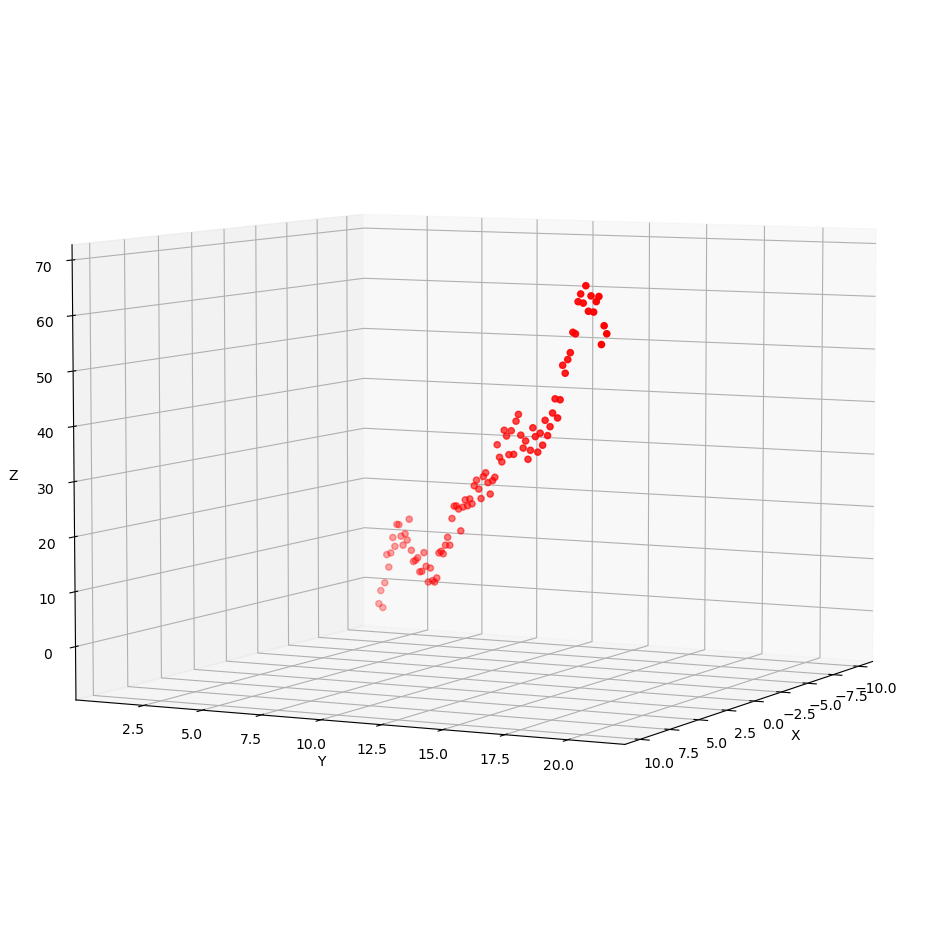

In [14]:
x = pylab.arange( -10., 10., .2 )
y = pylab.arange( 1., 21., .2 )
noise = np.array([random.gauss(0, 2) for _ in range(len(x))])

z = x*np.sin(x) + y*np.log(y) + noise

fig = plt.figure(figsize=(12, 12)) # Create figure
ax = fig.add_subplot(111, projection='3d') # Plots axes
ax.scatter(x, y, z, c="red")


ax.set_xlabel( "X" )
ax.set_ylabel( "Y" )
ax.set_zlabel( "Z" )
ax.view_init(6, 27)

plt.show()

In [15]:
IN = np.array([x, y])
eqX, eqY = [lambda x: x*np.sin(x)], [lambda y: y*np.log(y)]

A, x_hat = LR(IN, z, 2, 0, 0, eqX, eqY)

In [16]:
Z_hat = A.T @ x_hat

err = '{:.2f}'.format(np.sqrt(sum((Z_hat - z)**2)))

/tmp/ipykernel_224/387665385.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap="bone")


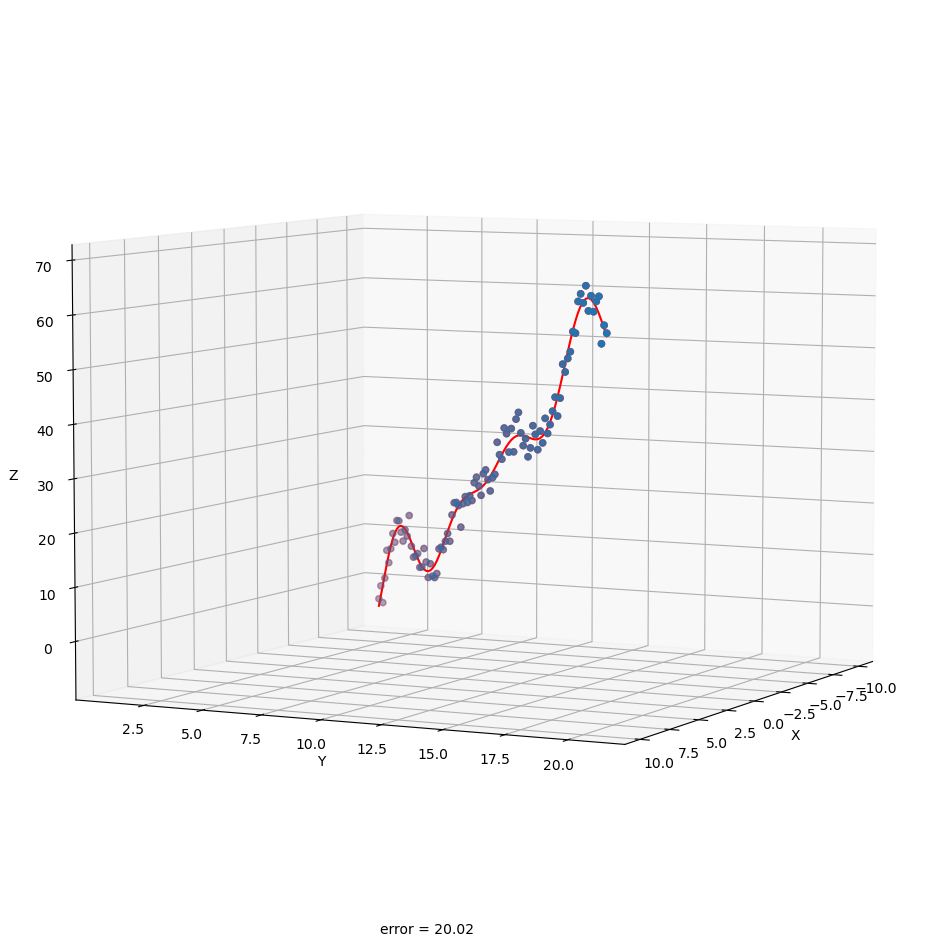

In [17]:
fig = plt.figure(figsize=(12, 12)) # Create figure
ax = fig.add_subplot(111, projection='3d') # Plots axes
ax.scatter(x, y, z, color="red")
ax.scatter(x, y, z, cmap="bone")
ax.plot(x, y, Z_hat, color="red" )
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(6, 27)

ax.text2D(0.4, 0, f'error = {err}', transform=ax.transAxes)
  
plt.show()